In [21]:
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Parameters from PhysRevMaterials.3.034602
a = 3.996 # Angs
c = 6.590 # Angs
u = 0.3744
hexGe = bulk('GeGe', 'wurtzite', a=a, c=c, u=u)
calc = GPAW(mode=PW(500),
            #xc='TB09', # = mBJ on VASP?
            xc='MGGA_X_SCAN+MGGA_C_SCAN',
            #xc='PBE',
            kpts={'size': (4, 4, 4), 'gamma': True},  # shifted Monkhorst-pack
            random=True,  # random guess (needed if many empty bands required)
            occupations=FermiDirac(0.01),
            txt='gs.txt'
            )
hexGe.calc = calc
hexGe.get_potential_energy()

-70.66112846143425

In [23]:
calc = hexGe.calc.fixed_density(
    #nbands=16,
    symmetry='off',
    txt='bands.txt',
    kpts={'path': 'AGML', 'npoints': 60}
    )

In [24]:
bs = calc.band_structure()
bs = bs.subtract_reference()
bs.energies.shape

(1, 60, 14)

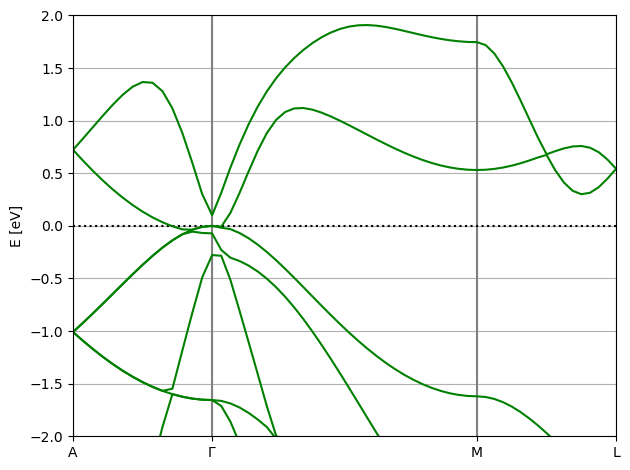

In [25]:
bs.plot(show=False, emin=-2, emax=2)
plt.ylabel('E [eV]')
plt.grid()
plt.tight_layout()
plt.show()